<a href="https://colab.research.google.com/github/marinasbrum/ExploringNonverbalCommunication/blob/main/Emotional_Responses_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação de Bibliotecas:

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

Leitura do arquivo CSV:

In [56]:
file_path = '/content/drive/My Drive/Portfólio/teste.csv'

teste = pd.read_csv(file_path)

Montando o gráfico das olhadas de Jim Halpert para a câmera por episódio em cada temporada:


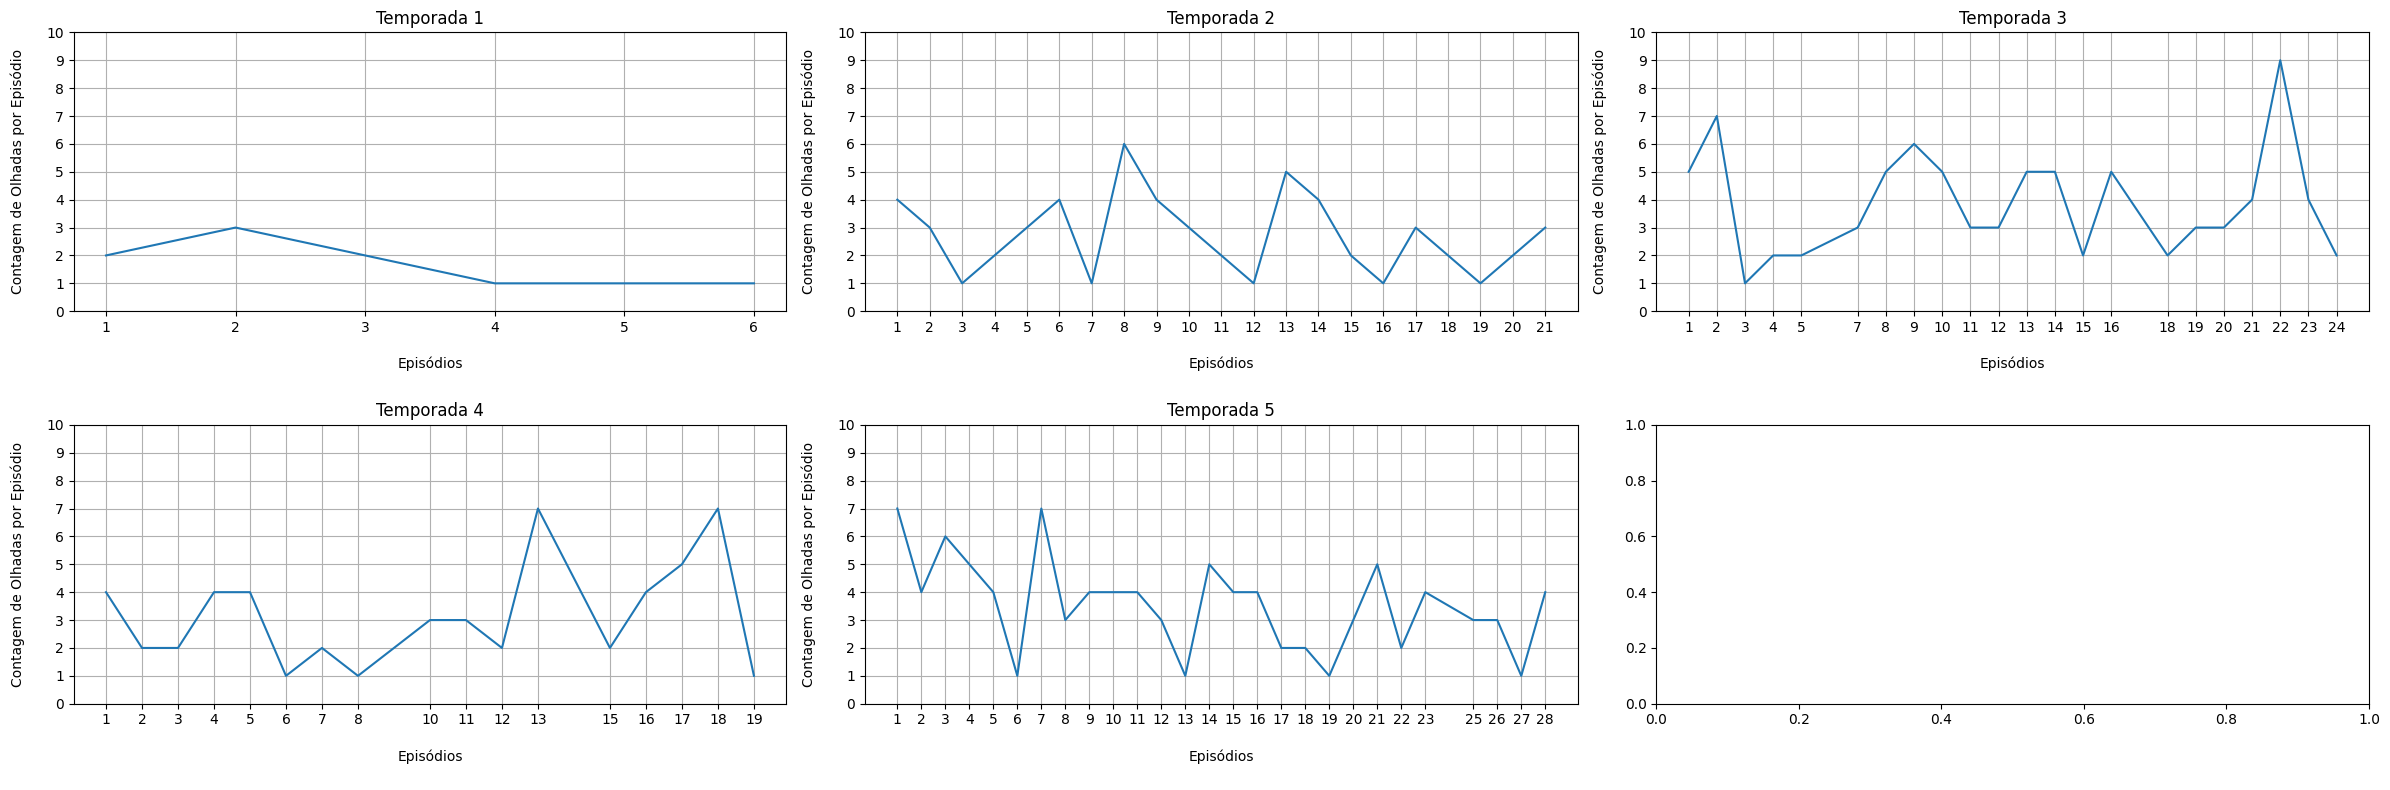

In [57]:
looks = teste.groupby(['Season', 'Episode']).size().reset_index(name='frq')
fig, axes = plt.subplots(nrows = (len(looks['Season'].unique()) + 2) // 3, ncols = 3, figsize = (24, 8))

for idx, (season, seasons) in enumerate(looks.groupby('Season')):
    row_idx = idx // 3
    col_idx = idx % 3

    ax = axes[row_idx, col_idx]
    ax.plot(seasons['Episode'], seasons['frq'])
    ax.set_xticks(seasons['Episode'])
    ax.set_yticks(range(0, 11))
    ax.set_title(f'Temporada {season}')
    ax.set_xlabel('\nEpisódios\n')
    ax.set_ylabel('Contagem de Olhadas por Episódio\n')
    ax.grid(True)

plt.tight_layout()
plt.show()

Plotando o gráfico de barras do número total de olhadas de Jim para a câmera registradas por temporada:

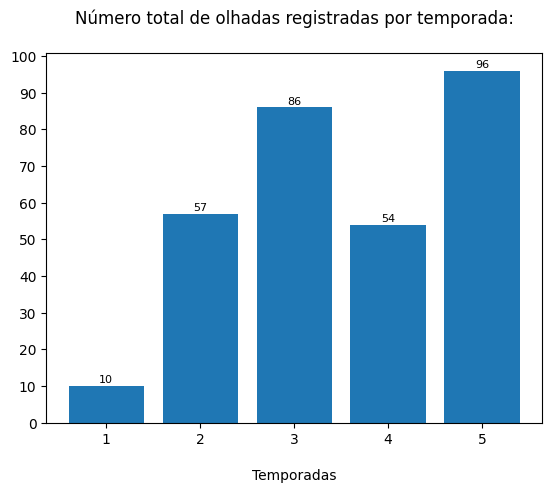

In [58]:
looks = teste.groupby('Season').size()
bars = plt.bar(looks.index, looks.values)

for bar, look in zip(bars, looks.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, look,
             ha ='center', va ='bottom', fontsize = 8)

plt.xticks(looks.index)
plt.yticks(range(0, max(looks) + 10, 10))
plt.title(f'Número total de olhadas registradas por temporada:\n')
plt.xlabel('\nTemporadas')
plt.show()

Plotando o gráfico de barras da média de olhadas por episódio em cada temporada:

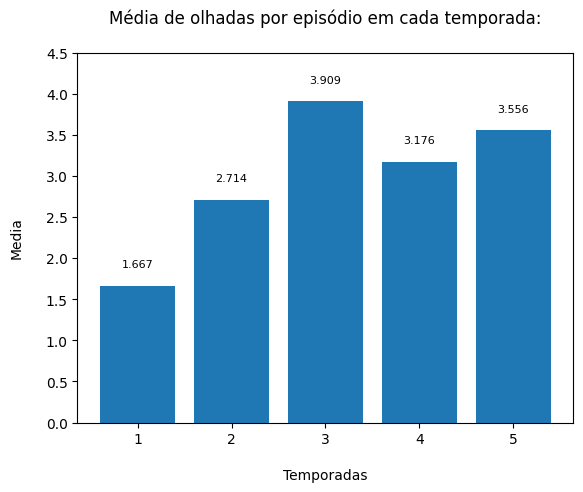

In [59]:
sum = teste.groupby('Season').size()
episodes = teste.groupby('Season')['Episode'].nunique()
media = sum / episodes
bars = plt.bar(media.index, media.values)

for bar, value in zip(bars, media.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.2, f'{value:.3f}',
             ha = 'center', va = 'bottom', fontsize = 8)

plt.xticks(media.index)
plt.yticks([round(num, 2) for num in plt.gca().get_yticks()])
plt.title('Média de olhadas por episódio em cada temporada:\n')
plt.xlabel('\nTemporadas')
plt.ylabel('Media\n')
plt.show()

Plotando o gráfico de barras do total de olhadas registradas de cada influenciador:

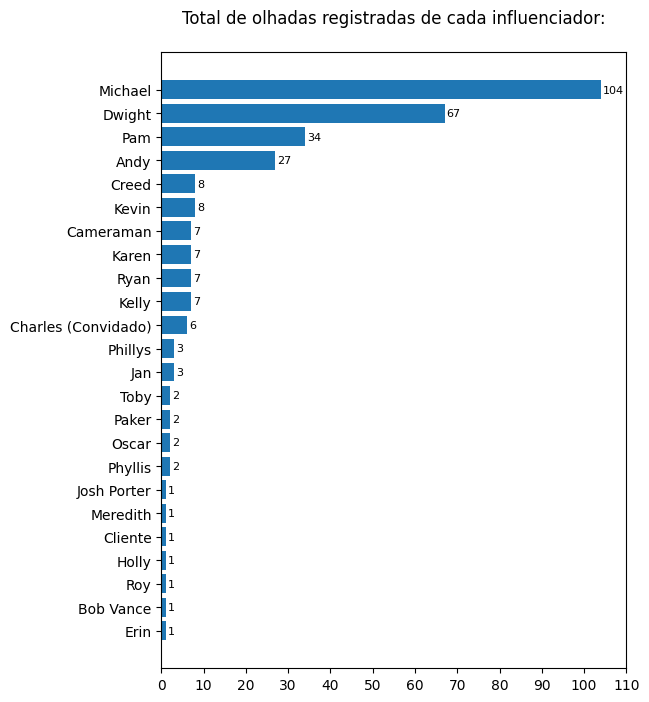

In [60]:
count = teste['Influencer'].str.strip().value_counts()
characters = count.index.tolist()[::-1]
count = count.values.tolist()[::-1]
reverse = pd.DataFrame({
    'Influencer': characters,
    'Count': count
})

plt.figure(figsize=(6, 8))
bars = plt.barh(reverse['Influencer'], reverse['Count'])
for bar, looks, influencer in zip(bars, count, characters):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, looks,
             ha = 'left', va = 'center', fontsize = 8)

plt.xticks(range(0, max(count) + 10, 10))
plt.yticks(range(len(characters)), characters)
plt.title(f'Total de olhadas registradas de cada influenciador:\n')
plt.show()

Plotando gráficos de pizza com a distribuição percentual das emoções como resposta emocional das olhadas de Jim para cada influenciador:

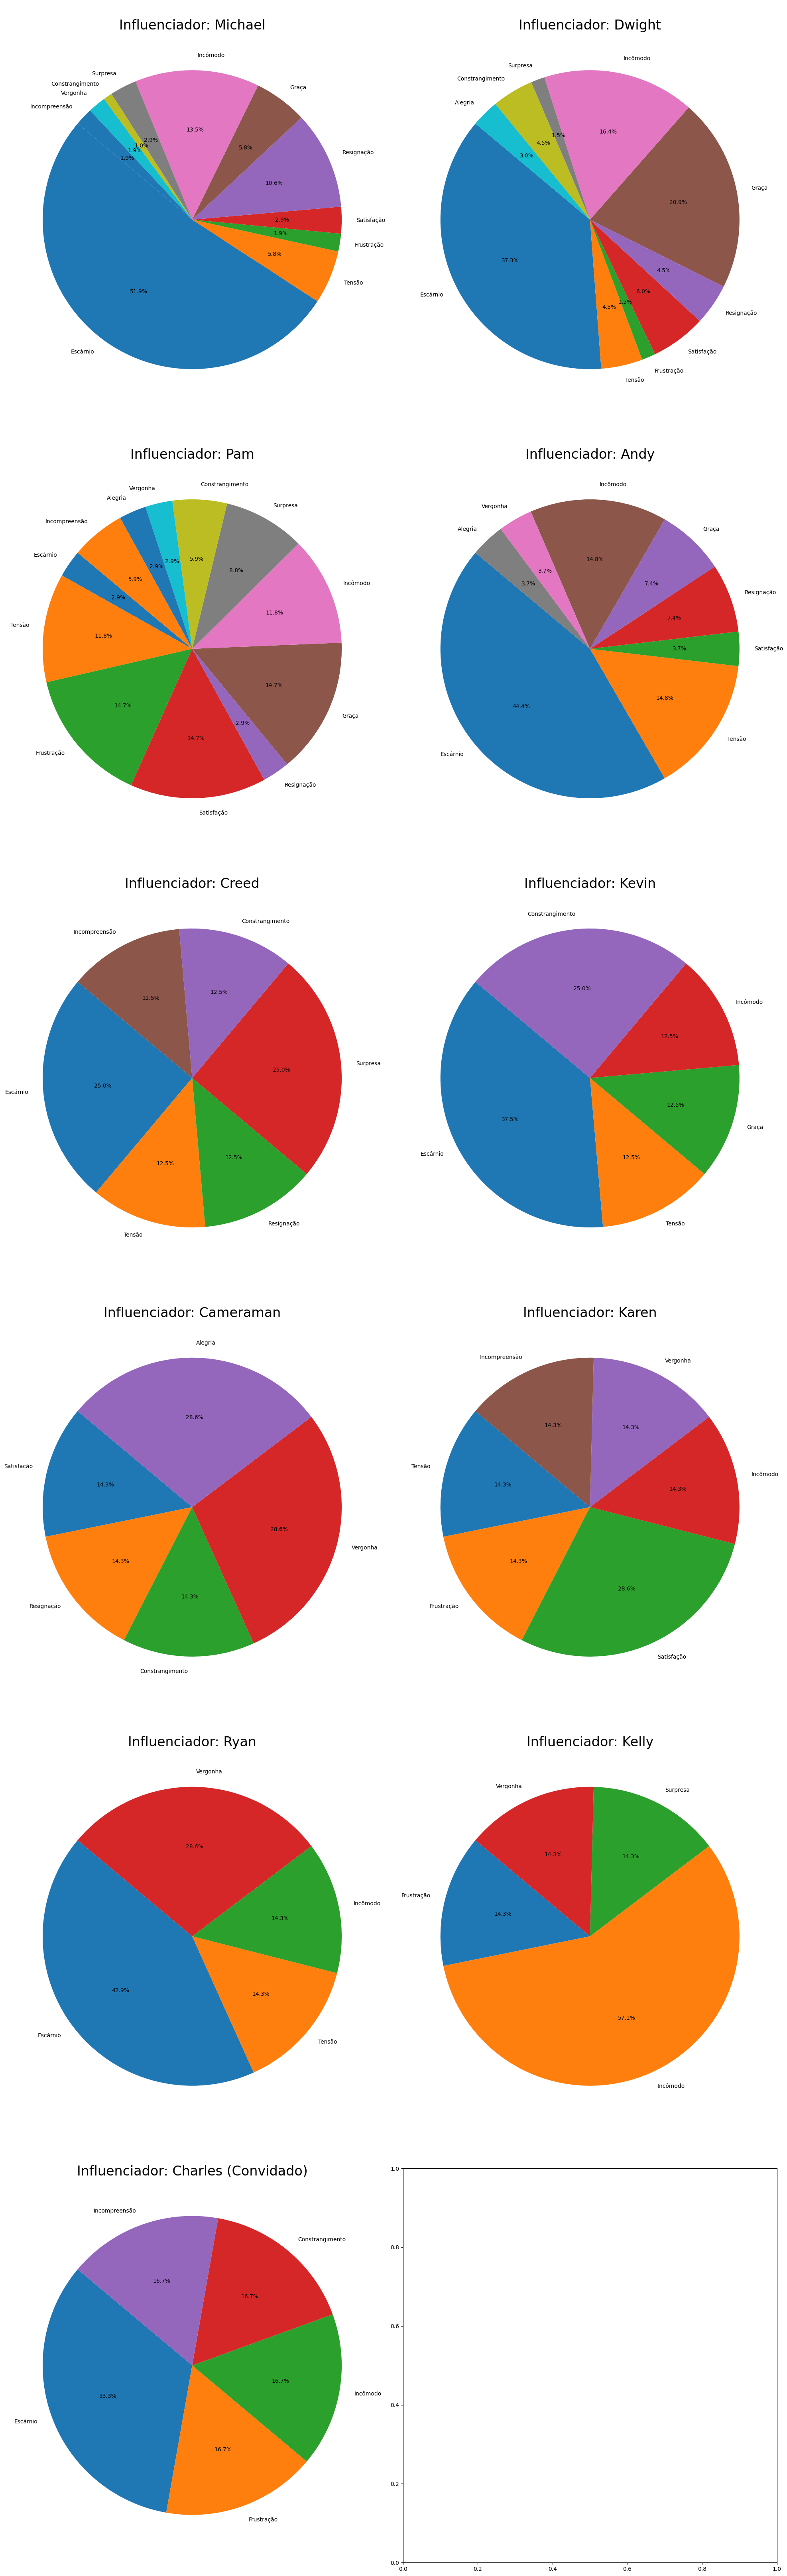

In [61]:
reverse = reverse.sort_values(by='Count', ascending=False)
responses = teste['Emotional_Responses'].str.strip().unique()
for response in responses:
    counts = teste[teste['Emotional_Responses'].str.strip() == response]['Influencer'].value_counts()
    reverse[response] = reverse['Influencer'].map(counts).fillna(0).astype(int)
    reverse[f'{response}_percentage'] = (reverse[response] / reverse['Count']) * 100

least_influencers = reverse[reverse['Count'] <= 5]
reverse = reverse[reverse['Count'] > 5]                                                 # Verificar a possibilidade de aumentar pra 10
fig, axes = plt.subplots(nrows = (len(reverse) + 1) // 2, ncols = 2, figsize=(20,65))

for idx, influencer_row in enumerate(reverse.iterrows()):
    row_idx = idx // 2
    col_idx = idx % 2
    ax = axes[row_idx, col_idx]
    filtered_responses = [response for response in responses if influencer_row[1][response] > 0]
    percentages = influencer_row[1][[f'{response}_percentage' for response in filtered_responses]].tolist()
    labels = filtered_responses

    if filtered_responses:
        ax.pie(percentages, labels = labels, autopct = '%1.1f%%', startangle = 140)
        ax.set_title(f'\nInfluenciador: {influencer_row[1]["Influencer"]}', fontsize = 24)
        #ax.legend(loc = 'best', bbox_to_anchor=(1.2, 1.1))

fig.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.tight_layout()
plt.show()


Mostrando em uma DataFrame os personagens que influenciaram um n° de olhadas menor que 5:

In [72]:
#keep
keep_col = least_influencers.columns[:2].tolist() + least_influencers.columns[least_influencers.columns.str.contains('_percentage', case=False)].tolist()
least_influencers = least_influencers[keep_col]
#drop
zero = least_influencers.drop(least_influencers.columns[0], axis=1).sum(skipna=True, axis=0) == 0
drop_col = zero[zero].index.tolist()
least_influencers = least_influencers.drop(drop_col, axis=1)

def color_cells(val):
    color = 'background-color: '
    if isinstance(val, (int, float)) and val == 0:
        return color + 'white'
    elif isinstance(val, (int, float)):
        return color + f'rgba({int(val*255)}, 0, 0, 0.2)'
    else:
        return ''

styled = least_influencers.style.applymap(color_cells)
styled

,Influencer,Count,Escárnio_percentage,Tensão_percentage,Satisfação_percentage,Resignação_percentage,Incômodo_percentage,Surpresa_percentage,Constrangimento_percentage,Vergonha_percentage
12,Phillys,3.000,0.000,0.000,0.000,0.000,33.333,66.667,0.000,0.000
11,Jan,3.000,0.000,33.333,0.000,0.000,33.333,33.333,0.000,0.000
10,Toby,2.000,0.000,0.000,0.000,0.000,50.000,0.000,50.000,0.000
9,Paker,2.000,0.000,0.000,50.000,0.000,50.000,0.000,0.000,0.000
8,Oscar,2.000,0.000,0.000,0.000,50.000,0.000,0.000,0.000,50.000
7,Phyllis,2.000,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.000
1,Bob Vance,1.000,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.000
6,Josh Porter,1.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,Meredith,1.000,0.000,0.000,0.000,0.000,0.000,0.000,100.000,0.000
4,Cliente,1.000,0.000,100.000,0.000,0.000,0.000,0.000,0.000,0.000
